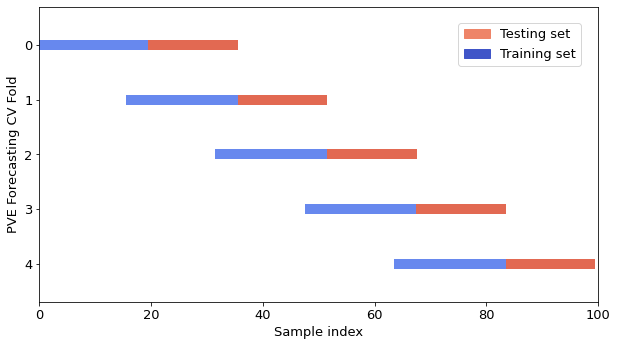

In [3]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4
plt.rcParams.update({'font.size': 13})


n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))



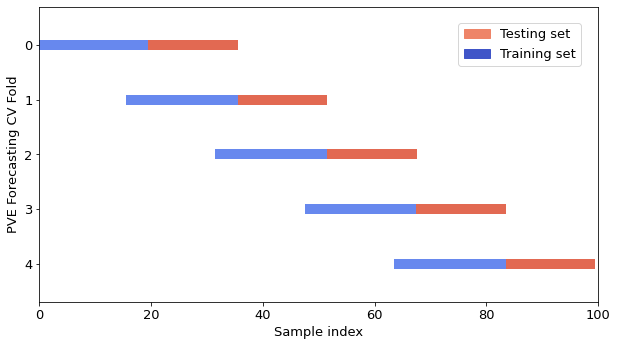

In [5]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    yticklabels = list(range(n_splits)) 
    ax.set(
        yticks=np.arange(n_splits ) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="PVE Forecasting CV Fold",
        ylim=[n_splits + 0.2, -0.2],
        xlim=[0, 100],
    )
#     ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


cvs = [TimeSeriesSplit]
n_splits = 5
for cv in cvs:
    this_cv = cv(n_splits=n_splits, max_train_size = 20 )
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(0.75, 0.8), 
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    
# plt.savefig(f'../figures/ts_cv.png', dpi=300, bbox_inches='tight')
plt.show()

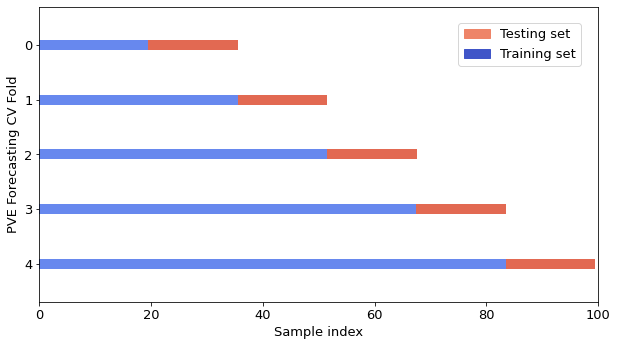

In [4]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    yticklabels = list(range(n_splits)) 
    ax.set(
        yticks=np.arange(n_splits ) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="PVE Forecasting CV Fold",
        ylim=[n_splits + 0.2, -0.2],
        xlim=[0, 100],
    )
#     ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


cvs = [TimeSeriesSplit]
n_splits = 5
for cv in cvs:
    this_cv = cv(n_splits=n_splits) 
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(0.75, 0.8), 
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    
# plt.savefig(f'../figures/expanding_window.png', dpi=300, bbox_inches='tight')
plt.show()